# Multi-class Image Classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create the model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-11-02 16:36:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 172.217.212.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   173MB/s    in 2.9s    

2021-11-02 16:36:30 (173 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [3]:
# Let's get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [15]:
# Visualize
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
  # Setup target directory 
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

Image shape: (512, 512, 3)


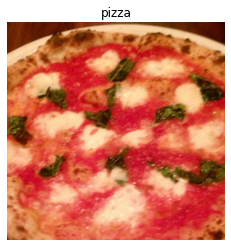

In [ ]:
import random
view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

## 2. Preprocess the data

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale 
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn in into batches
train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir, 
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


 ## 3. Create the model (start with a baseline)

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (CNN explainer website model)
model = Sequential([
  Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

## 4. Fit a model

In [ ]:
# Fit the model
history = model.fit(train_data, 
                    epochs=5, 
                    steps_per_epoch=len(train_data), 
                    validation_data=test_data, 
                    validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 87s 241ms/step - loss: 2.1386 - accuracy: 0.2145 - val_loss: 2.0316 - val_accuracy: 0.2932
Epoch 2/5
235/235 [==============================] - 56s 237ms/step - loss: 1.8595 - accuracy: 0.3576 - val_loss: 1.9012 - val_accuracy: 0.3364
Epoch 3/5
235/235 [==============================] - 57s 241ms/step - loss: 1.4928 - accuracy: 0.4943 - val_loss: 2.0364 - val_accuracy: 0.3188
Epoch 4/5
235/235 [==============================] - 57s 242ms/step - loss: 0.8716 - accuracy: 0.7127 - val_loss: 2.6676 - val_accuracy: 0.3012
Epoch 5/5
235/235 [==============================] - 57s 241ms/step - loss: 0.3517 - accuracy: 0.8921 - val_loss: 3.5920 - val_accuracy: 0.2660


## 5. Evaluate the model

In [ ]:
# Evaluate on the test data
model.evaluate(test_data)

79/79 [==============================] - 13s 160ms/step - loss: 3.5920 - accuracy: 0.2660


[3.592047691345215, 0.26600000262260437]

In [13]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

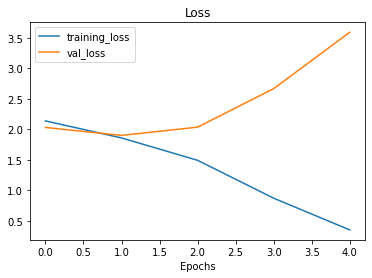

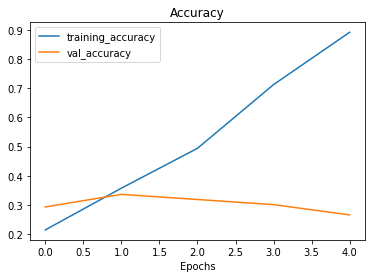

In [ ]:
# Check out the model's loss curves
plot_loss_curves(history)

It seems our model is **overfitting** the training set quite badly. In other words, it's getting great results on the training data but fails to generalize well to unseen data and perfomes poorly on the test dataset.

## 6. Adjust the model hyperparameters (to beat baseline/reduce overfitting)

In [ ]:
# How about we try to simplify the model first. Let's try to remove 2 convolutional layers.

model_2 = Sequential([
  Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

# Compile the model
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
# Fit the model
history_2 = model_2.fit(train_data, 
                    epochs=5, 
                    steps_per_epoch=len(train_data), 
                    validation_data=test_data, 
                    validation_steps=len(test_data))

Looks like our "simplifying the model" experiment didn't work

### Trying to reduce overfitting with data augmentation

In [6]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=32,
                                                                  class_mode="categorical")


Found 7500 images belonging to 10 classes.


In [7]:
# Let's create another model and fit on the augmented training data
model_3 = tf.keras.models.clone_model(model)

# Compile the cloned model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [9]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [10]:
# Fit the model
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 161s 553ms/step - loss: 2.2034 - accuracy: 0.1892 - val_loss: 2.0316 - val_accuracy: 0.2876
Epoch 2/5
235/235 [==============================] - 131s 556ms/step - loss: 2.0414 - accuracy: 0.2743 - val_loss: 1.9050 - val_accuracy: 0.3300
Epoch 3/5
235/235 [==============================] - 126s 534ms/step - loss: 1.9674 - accuracy: 0.3169 - val_loss: 1.8141 - val_accuracy: 0.3776
Epoch 4/5
235/235 [==============================] - 127s 541ms/step - loss: 1.9341 - accuracy: 0.3276 - val_loss: 1.8383 - val_accuracy: 0.3412
Epoch 5/5
235/235 [==============================] - 128s 544ms/step - loss: 1.9067 - accuracy: 0.3463 - val_loss: 1.7781 - val_accuracy: 0.3956


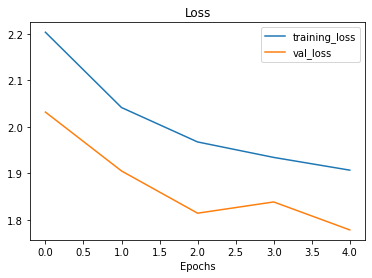

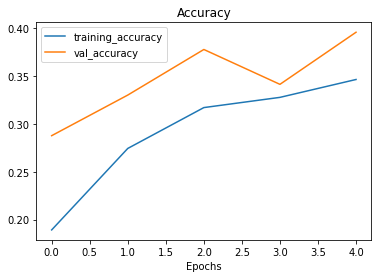

In [16]:
# Check out augmented model loss curves
plot_loss_curves(history_3) 

## Making a prediction with our trained model

In [17]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [22]:
# Download some custom images
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg

--2021-11-02 17:11:27--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg       [ <=>                ] 134.96K  --.-KB/s    in 0.08s   

2021-11-02 17:11:27 (1.75 MB/s) - ‘03-pizza-dad.jpeg’ saved [138201]

--2021-11-02 17:11:28--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg           [ <=>                ] 134.81K  --.-KB/s    in 0.07s   

2021-11-02 17:11:28 (1.77 MB/s) - ‘03-steak.jpeg’ saved [138049]



In [20]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [21]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [26]:
# Make a prediction
pred_and_plot(model=model_3,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

InvalidArgumentError: ignored

## Saving and loading our model


In [27]:
# Save a model
model_3.save("saved_trained_model_3")

INFO:tensorflow:Assets written to: saved_trained_model_3/assets


In [28]:
# Load in a trained model and evaluate it 
loaded_model = tf.keras.models.load_model("saved_trained_model_3")
loaded_model.evaluate(test_data)

79/79 [==============================] - 13s 161ms/step - loss: 1.7781 - accuracy: 0.3956


[1.778119683265686, 0.39559999108314514]